# Using the same code as before, please solve the following exercises
    1. Change the number of observations to 100,000 and see what happens.
    2. Play around with the learning rate. Values like 0.0001, 0.001, 0.1, 1 are all interesting to observe. 
    3. Change the loss function. An alternative loss for regressions is the Huber loss. 
    The Huber loss is more appropriate than the L2-norm when we have outliers, as it is less sensitive to them (in our example we don't have outliers, but you will surely stumble upon a dataset with outliers in the future). The L2-norm loss puts all differences *to the square*, so outliers have a lot of influence on the outcome. 
    The proper syntax of the Huber loss is 'huber_loss'
    
    
Useful tip: When you change something, don't forget to RERUN all cells. This can be done easily by clicking:
Kernel -> Restart & Run All
If you don't do that, your algorithm will keep the OLD values of all parameters.

You can either use this file for all the exercises, or check the solutions of EACH ONE of them in the separate files we have provided. All other files are solutions of each problem. If you feel confident enough, you can simply change values in this file. Please note that it will be nice, if you return the file to starting position after you have solved a problem, so you can use the lecture as a basis for comparison.

## Import the relevant libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## Data generation

We generate data using the exact same logic and code as the example from the previous notebook. The only difference now is that we save it to an npz file. Npz is numpy's file type which allows you to save numpy arrays into a single .npz file. We introduce this change because in machine learning most often: 

* you are given some data (csv, database, etc.)
* you preprocess it into a desired format (later on we will see methods for preprocesing)
* you save it into npz files (if you're working in Python) to access later

Nothing to worry about - this is literally saving your NumPy arrays into a file that you can later access, nothing more.

In [2]:
obs = 10000

inputs1 = np.random.uniform(-10, 10, (obs, 1))
inputs2 = np.random.uniform(-10, 10, (obs, 1))
inputs = np.column_stack((inputs1, inputs2))

noise = np.random.uniform(-1, 1, (obs, 1))

targets = 2*inputs1 + 3*inputs2 + 4 + noise

np.savez('TF_intro', inputs=inputs, targets=targets)

## Solving with TensorFlow

<i/>Note: This intro is just the basics of TensorFlow which has way more capabilities and depth than that.<i>

In [3]:
training_data = np.load('TF_intro.npz')

In [4]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.02), loss='huber_loss')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
313/313 - 2s - loss: 2.2952 - 2s/epoch - 5ms/step
Epoch 2/100
313/313 - 1s - loss: 0.1761 - 755ms/epoch - 2ms/step
Epoch 3/100
313/313 - 1s - loss: 0.1753 - 760ms/epoch - 2ms/step
Epoch 4/100
313/313 - 1s - loss: 0.1743 - 746ms/epoch - 2ms/step
Epoch 5/100
313/313 - 1s - loss: 0.1749 - 620ms/epoch - 2ms/step
Epoch 6/100
313/313 - 1s - loss: 0.1747 - 632ms/epoch - 2ms/step
Epoch 7/100
313/313 - 1s - loss: 0.1752 - 614ms/epoch - 2ms/step
Epoch 8/100
313/313 - 1s - loss: 0.1749 - 641ms/epoch - 2ms/step
Epoch 9/100
313/313 - 1s - loss: 0.1751 - 605ms/epoch - 2ms/step
Epoch 10/100
313/313 - 1s - loss: 0.1769 - 639ms/epoch - 2ms/step
Epoch 11/100
313/313 - 1s - loss: 0.1759 - 609ms/epoch - 2ms/step
Epoch 12/100
313/313 - 1s - loss: 0.1752 - 609ms/epoch - 2ms/step
Epoch 13/100
313/313 - 1s - loss: 0.1748 - 639ms/epoch - 2ms/step
Epoch 14/100
313/313 - 1s - loss: 0.1754 - 611ms/epoch - 2ms/step
Epoch 15/100
313/313 - 1s - loss: 0.1761 - 633ms/epoch - 2ms/step
Epoch 16/100
313/313 -

## Extract the weights and bias
Extracting the weight(s) and bias(es) of a model is not an essential step for the machine learning process. In fact, usually they would not tell us much in a deep learning context. However, this simple example was set up in a way, which allows us to verify if the answers we get are correct.

In [5]:
model.layers[0].get_weights()

[array([[2.0015454],
        [3.0105126]], dtype=float32),
 array([4.0036373], dtype=float32)]

In [6]:
weights = model.layers[0].get_weights()[0]
weights

array([[2.0015454],
       [3.0105126]], dtype=float32)

In [7]:
bias = model.layers[0].get_weights()[1]
bias

array([4.0036373], dtype=float32)

## Extract the outputs (make predictions)
Once more, this is not an essential step, however, we usually want to be able to make predictions.

In [8]:
model.predict_on_batch(training_data['inputs'])

array([[-12.825769 ],
       [-11.160012 ],
       [ -6.9130573],
       ...,
       [-24.147518 ],
       [ 31.496796 ],
       [ 49.006203 ]], dtype=float32)

## Plotting the data

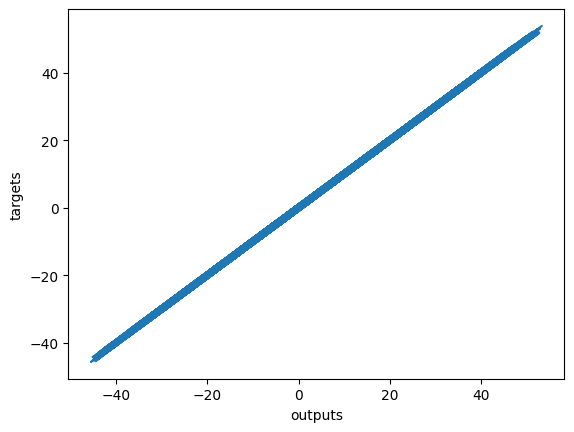

In [9]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()